In [1]:
from utils import prepare_image_forgery_dataset

data_directory = '../data'

IMG_SIZE=(128, 128)

X_train, X_test, y_train, y_test = prepare_image_forgery_dataset(total_number=6000, test_size=0.2, random_state=42, 
                                                                 data_directory=data_directory, img_size=IMG_SIZE)

2024-07-08 19:59:15.735884: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 19:59:15.735951: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 19:59:15.737296: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-08 19:59:15.745459: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-08 19:59:16.560362: W tensorflow/compiler/tf2

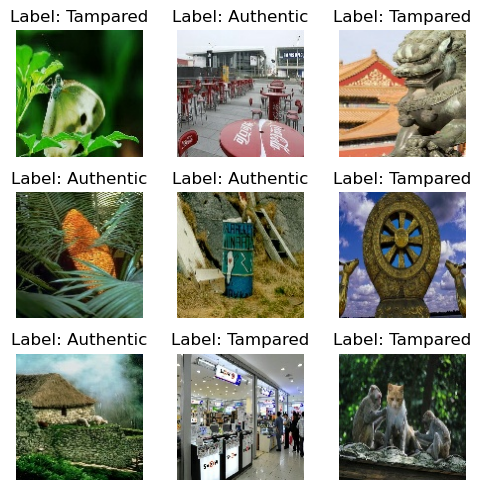

In [2]:
from utils import display_images

classnames = ['Authentic', 'Tampared']

display_images(X_train, y_train, classnames=classnames)

In [3]:
from models.cnn import CNNImageForgeryDetector

model = CNNImageForgeryDetector(compression_quality=80, learning_rate=0.001)

In [4]:
history = model.fit(X_train, y_train)

Epoch 1/10
135/135 [==============================] - 120s 881ms/step - loss: 2.1788 - accuracy: 0.5847 - val_loss: 0.6794 - val_accuracy: 0.6062
Epoch 2/10
135/135 [==============================] - 122s 907ms/step - loss: 0.6497 - accuracy: 0.6243 - val_loss: 0.6284 - val_accuracy: 0.6396
Epoch 3/10
135/135 [==============================] - 121s 899ms/step - loss: 0.5477 - accuracy: 0.7315 - val_loss: 0.6187 - val_accuracy: 0.6375
Epoch 4/10
135/135 [==============================] - 122s 905ms/step - loss: 0.2554 - accuracy: 0.8951 - val_loss: 0.8201 - val_accuracy: 0.6792
Epoch 5/10
135/135 [==============================] - 123s 913ms/step - loss: 0.0456 - accuracy: 0.9877 - val_loss: 1.2558 - val_accuracy: 0.6604
Epoch 6/10
135/135 [==============================] - 121s 897ms/step - loss: 0.0123 - accuracy: 0.9977 - val_loss: 1.2997 - val_accuracy: 0.6562
Epoch 7/10
135/135 [==============================] - 120s 890ms/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: 1.7178 -

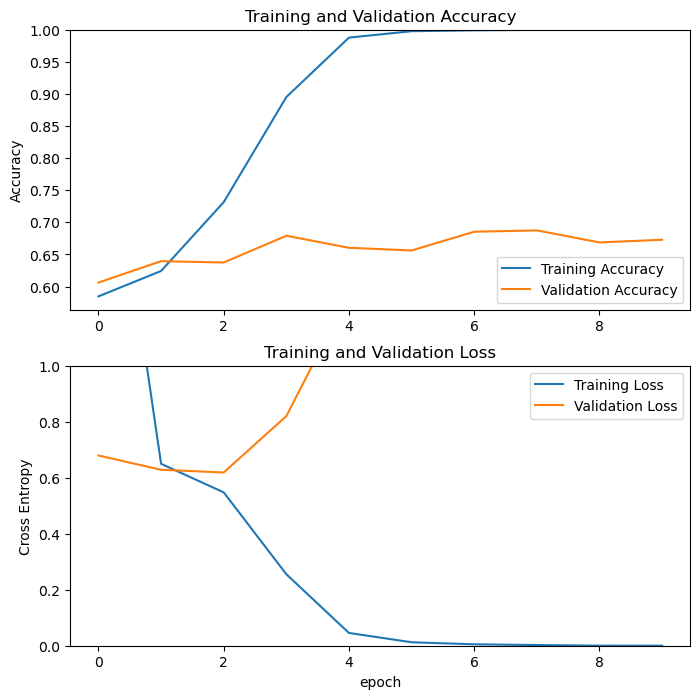

In [5]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [6]:
y_pred = model.predict(X_test)

38/38 [==============================] - 4s 115ms/step


In [7]:
from utils import print_model_performance_metrics

print_model_performance_metrics(y_test, y_pred)

+----------------------+---------------------+
| Metric               |               Value |
+----------------------+---------------------+
| False Positives (FP) |                 564 |
| False Negatives (FN) |                 254 |
| True Positives (TP)  |                 226 |
| True Negatives (TN)  |                 156 |
| Precision            | 0.28607594936708863 |
| Recall               |  0.4708333333333333 |
| F1-score             |  0.3559055118110236 |
| Overall Accuracy     | 0.31833333333333336 |
+----------------------+---------------------+
